<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/NLP/4-2-Visualization-2D-Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openai==0.28
!pip install python-dotenv
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00


In [2]:
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

In [3]:
import os
import openai

api_key = os.getenv("OPENAI_API_KEY")

In [4]:
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()
# Access the API key using the variable name defined in the .env file
api_key = os.getenv("OPENAI_API_KEY")

In [5]:
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

num_tokens_from_string("tiktoken is great!", "cl100k_base")

6

1. Reduce dimensionality

In [7]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

# Load the embeddings
datafile_path = "fine_food_reviews_with_embeddings_1k.csv"
df = pd.read_csv(datafile_path)

# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(literal_eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape


(1000, 2)

2. Plotting the embeddings

1개: 빨간색
2개: 진한 주황색
3개: 골드
4개: 청록색
5개: 진한 녹색

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

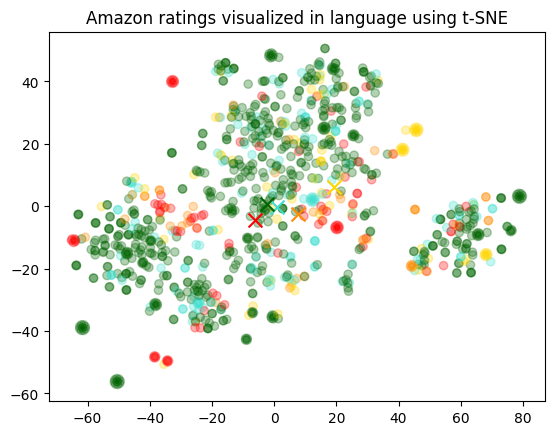

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon ratings visualized in language using t-SNE")